<a href="https://colab.research.google.com/github/khalidashani/MscProject/blob/main/DataManagement_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

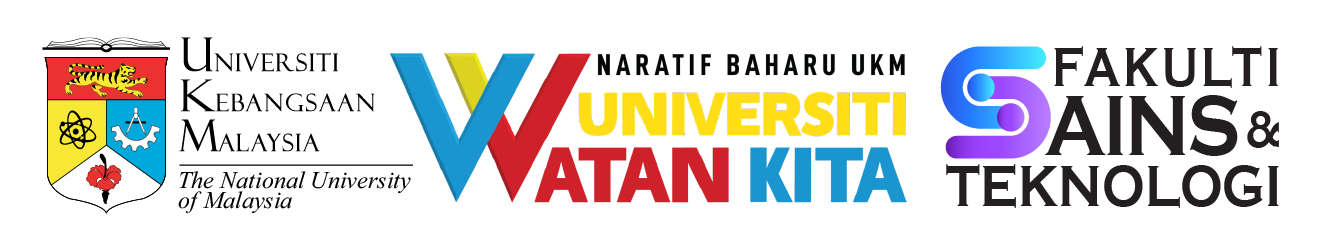

# Project 1
## **STQD6324 Data Management Semester 2 2025/2026**
*Muhammad Khalid Bin Noor Ashani (P146854)*

# **Economic Indicator Analysis Using Hive on a Virtualized Data Environment**

---

## **Table of Contents**

1. [**Introduction**](#introduction)  
2. [**Problem Statement**](#problem-statement)  
3. [**Methodology and Implementation**](#methodology-and-implementation)  
   - [**Data Overview**](#data-overview)  
   - [**Analytical Procedures**](#analytical-procedures)  
     - [Time Series Analysis](#question1)  
     - [Correlation Analysis](#question2)  
     - [Rolling Average Smoothing](#question3)  
4. [**Discussion and Findings**](#discussion-and-findings)  
5. [**Conclusion**](#conclusion)  

---

### **Introduction** <a name='intro'></a>

Understanding economic activity is crucial for forecasting, planning, and policy. Indicators like leading, coincident, and lagging indexes offer valuable insights into different business cycle phases – from early signals to confirmation and after-effects. To truly grasp how these indicators interact over time, this report will use three complementary approaches: time series analysis, correlation analysis, and rolling average smoothing.

The data for this study spans decades of monthly observations, covering key metrics: the leading, coincident, and lagging indexes, plus their respective diffusion indexes. Together, these variables provide a picture of economic performance and momentum.

Our goal in this report is to uncover patterns and relationships in this dataset by:

* Examining how each indicator changes over time, looking for trends or unusual behavior with time series techniques.
* Measuring the connections between different indicators through correlation to understand their interdependence.
* Using rolling averages to smooth out short-term fluctuations and reveal the underlying long-term movement of these indicators.

Taken together, these analyses offer a comprehensive look at economic shifts, helping to make informed interpretations about the macroeconomic environment. The insights should be useful for economists, analysts, and anyone making decisions who wants a better understanding of economic signals and future conditions.

### **Problem Statement** <a name='problem_statement'></a>

1. **Time Series Analysis**

To understand how key economic indicators behave over time, this analysis will examine their progression. Applying time series techniques to the leading, coincident, and lagging indicators allows us to identify long-term trends, seasonal patterns, and potential anomalies in economic activity. Detecting such patterns is crucial for economic forecasting and policy-making; it helps pinpoint periods of economic expansion or contraction. We'll use visualizations like line plots, decomposition, and trend extraction to reveal the structural behavior of these indicators across the study period.

2. **Correlation Analysis**

With this analysis, we aim to quantify the strength and direction of the relationships among the different economic indicators in the dataset. We'll use Pearson correlation coefficients to see how closely changes in one indicator (say, the leading index) align with changes in others (like the coincident or lagging indices, and the diffusion indexes). Examining these correlations can illuminate how different parts of the economy move together or diverge over time. It can also help build more robust composite indicators and guide which features to use in further modeling.

3. **Rolling Average Analysis**

To smooth out short-term volatility and highlight persistent movements, we'll use rolling average analysis. This involves applying moving averages (using windows like 3-month or 6-month periods) to the economic indicators. The goal is to lessen the impact of temporary fluctuations and get a clearer view of cyclical behavior. This approach is particularly helpful with economic datasets, where monthly values can be swayed by temporary events or outliers. By averaging over a specified window, we get a clearer view of the underlying trend and can more accurately assess turning points in the economic cycle. This technique supports better decision-making by providing a more stable... (You can complete the sentence here as in your original text).

### **Methodology and Implementation** <a name='methodology-and-implementation'></a>

#### **Data Overview** <a name='data-overview'></a>

##### Validate if table are available in the HIVE enviroment

In [ ]:
#request:
conn = connect(
    host='127.0.0.1',
    port=10000,
    user='maria_dev',
    database='default',
    auth_mechanism='PLAIN'
)
cursor = conn.cursor()
cursor.execute('SHOW TABLES')
print(cursor.fetchall())

In [ ]:
#respond
 [('mei',)]

##### Look into the content of the table

In [ ]:
#request:
conn = connect(
    host='127.0.0.1',
    port=10000,
    user='maria_dev',
    database='default',
    auth_mechanism='PLAIN'
)

cursor = conn.cursor()

table_name = 'mei'

sql_query = f"""
SELECT *
FROM {table_name}
LIMIT 10
"""

cursor.execute(sql_query)
rows = cursor.fetchall()

print(f"Contents of table '{table_name}':")
for row in rows:
    print(row)

cursor.close()
conn.close()

In [ ]:
#respond:
Contents of table 'mei':
(datetime.date(1991, 1, 1), 56, 44, 40, 33, 80)
(datetime.date(1991, 2, 1), 57, 45, 40, 50, 80)
(datetime.date(1991, 3, 1), 57, 44, 40, 83, 80)
(datetime.date(1991, 4, 1), 57, 45, 40, 66, 60)
(datetime.date(1991, 5, 1), 57, 45, 40, 50, 80)
(datetime.date(1991, 6, 1), 57, 46, 40, 66, 100)
(datetime.date(1991, 7, 1), 58, 46, 40, 83, 100)
(datetime.date(1991, 8, 1), 58, 46, 41, 66, 80)
(datetime.date(1991, 9, 1), 58, 47, 41, 50, 100)
(datetime.date(1991, 10, 1), 58, 47, 41, 66, 100)

##### Look for missing value in table

In [ ]:
#request:
from impala.dbapi import connect

conn = connect(
    host='127.0.0.1',
    port=10000,
    user='maria_dev',
    database='default',
    auth_mechanism='PLAIN'
)

cursor = conn.cursor()

table_name = 'mei'

# 1. Get columns of the table
cursor.execute(f"DESCRIBE {table_name}")
columns = cursor.fetchall()  # Each row: (column_name, type, comment)
column_names = [col[0] for col in columns]

print(f"Checking missing (NULL) values in table '{table_name}':")

# 2. For each column, count total rows and null count
for col in column_names:
    sql = f"""
    SELECT
        COUNT(*) AS total_rows,
        COUNT(`{col}`) AS non_null_count,
        COUNT(*) - COUNT(`{col}`) AS null_count
    FROM {table_name}
    """
    cursor.execute(sql)
    total_rows, non_null_count, null_count = cursor.fetchone()
    print(f"Column '{col}': Total rows = {total_rows}, Non-null = {non_null_count}, NULLs = {null_count}")

cursor.close()
conn.close()

In [ ]:
#respond:
Checking missing (NULL) values in table 'mei':
Column 'date': Total rows = 411, Non-null = 411, NULLs = 0
Column 'leading': Total rows = 411, Non-null = 411, NULLs = 0
Column 'coincident': Total rows = 411, Non-null = 411, NULLs = 0
Column 'lagging': Total rows = 411, Non-null = 411, NULLs = 0
Column 'leading_diffusion': Total rows = 411, Non-null = 411, NULLs = 0
Column 'coincident_diffusion': Total rows = 411, Non-null = 411, NULLs = 0

##### Distribution of the data

In [ ]:
#request:
from impala.dbapi import connect

# Connect to the database
conn = connect(
    host='127.0.0.1',
    port=10000,
    user='maria_dev',
    database='default',
    auth_mechanism='PLAIN'
)
cursor = conn.cursor()

table_name = 'mei'

# Get column names
cursor.execute(f"DESCRIBE {table_name}")
columns = cursor.fetchall()
column_names = [col[0] for col in columns]

print(f"Value distribution for columns in table '{table_name}':\n")

for col in column_names:
    print(f"--- Distribution for column '{col}' ---")
    sql = f"""
    SELECT `{col}`, COUNT(*) AS count
    FROM {table_name}
    GROUP BY `{col}`
    ORDER BY count DESC
    LIMIT 10
    """
    cursor.execute(sql)
    results = cursor.fetchall()
    for value, count in results:
        print(f"{value} : {count}")
    print()

cursor.close()
conn.close()

In [ ]:
#respond:
Value distribution for columns in table 'mei':

--- Distribution for column 'date' ---
1991-01-01 : 1
2025-02-01 : 1
1991-03-01 : 1
1991-04-01 : 1
1991-05-01 : 1
1991-06-01 : 1
1991-07-01 : 1
2025-03-01 : 1
1991-09-01 : 1
1991-10-01 : 1

--- Distribution for column 'leading' ---
99 : 22
100 : 22
57 : 18
109 : 18
76 : 15
98 : 15
77 : 13
72 : 13
84 : 11
101 : 11

--- Distribution for column 'coincident' ---
75 : 16
78 : 12
76 : 12
79 : 12
66 : 11
113 : 10
111 : 10
99 : 10
87 : 10
68 : 9

--- Distribution for column 'lagging' ---
69 : 10
82 : 10
70 : 10
75 : 9
143 : 9
66 : 9
67 : 9
85 : 8
45 : 8
71 : 7

--- Distribution for column 'leading_diffusion' ---
71 : 64
57 : 60
42 : 40
85 : 39
50 : 33
83 : 33
66 : 31
28 : 27
100 : 27
33 : 25

--- Distribution for column 'coincident_diffusion' ---
100 : 139
83 : 65
66 : 60
50 : 36
80 : 35
0 : 15
60 : 14
33 : 10
75 : 10
16 : 9

#### **Analytical Procedures** <a name='analytical-procedures'></a>



##### Time Series <a name='question1'></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from impala.dbapi import connect

# Connect to Hive
conn = connect(
    host='127.0.0.1',
    port=10000,
    user='maria_dev',
    database='default',
    auth_mechanism='PLAIN'
)
cursor = conn.cursor()

# Query the data from Hive table mei
query = "SELECT * FROM mei"
cursor.execute(query)

# Fetch data and column names
columns = [col[0] for col in cursor.description]
rows = cursor.fetchall()

# Create DataFrame
df = pd.DataFrame(rows, columns=columns)

# Close connection
cursor.close()
conn.close()

# Remove 'mei.' prefix from column names
df.columns = df.columns.str.replace('mei.', '', regex=False)

# Check columns
print("Columns after rename:", df.columns.tolist())

# Convert 'date' to datetime and set as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Plot the time series data
plt.figure(figsize=(14, 6))
plt.plot(df['leading'], label='Leading Index', linewidth=2)
plt.plot(df['coincident'], label='Coincident Index', linewidth=2)
plt.plot(df['lagging'], label='Lagging Index', linewidth=2)

# Customize plot
plt.title('Economic Indicators Over Time')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

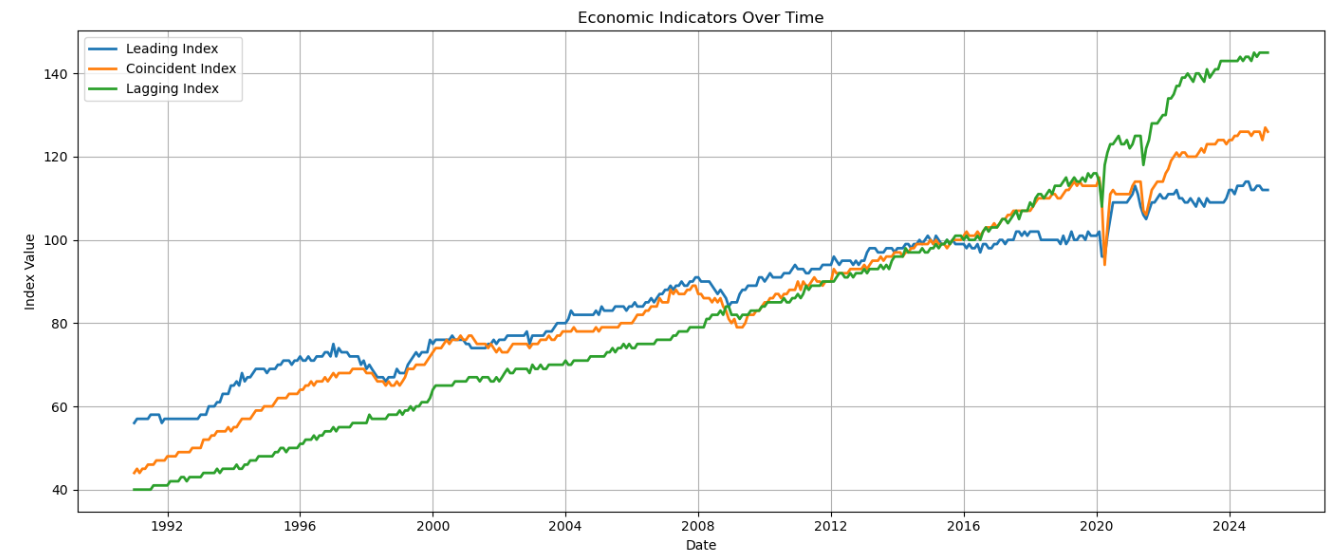

##### Correlation Analysis <a name='question2'></a>



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from impala.dbapi import connect
from impala.dbapi import connect

# Connect to Hive
conn = connect(
    host='127.0.0.1',
    port=10000,
    user='maria_dev',
    database='default',
    auth_mechanism='PLAIN'
)
cursor = conn.cursor()

# Query the data from Hive table mei
query = "SELECT * FROM mei"
cursor.execute(query)

# Fetch data and column names
columns = [col[0] for col in cursor.description]
rows = cursor.fetchall()

# Create DataFrame
df = pd.DataFrame(rows, columns=columns)

# Close connection
cursor.close()
conn.close()

# Remove 'mei.' prefix from column names
df.columns = df.columns.str.replace('mei.', '', regex=False)

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Drop the date column for correlation
numeric_df = df.drop(columns='date')

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Economic Indicators")
plt.tight_layout()
plt.show()

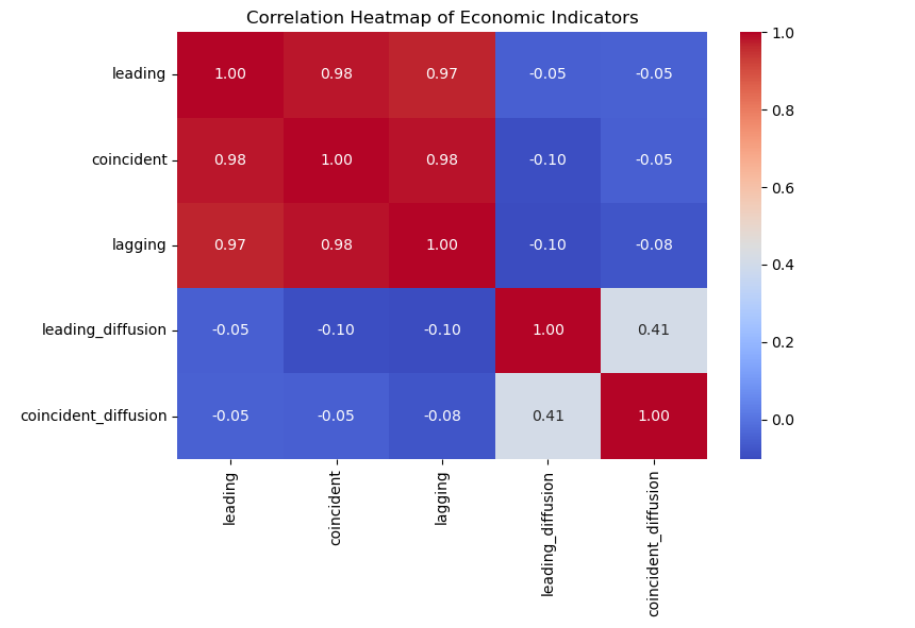

##### Rolling Average <a name='question3'></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from impala.dbapi import connect

# Connect to Hive
conn = connect(
    host='127.0.0.1',
    port=10000,
    user='maria_dev',
    database='default',
    auth_mechanism='PLAIN'
)
cursor = conn.cursor()

query = "SELECT * FROM mei"
cursor.execute(query)

columns = [col[0] for col in cursor.description]
rows = cursor.fetchall()

df = pd.DataFrame(rows, columns=columns)

cursor.close()
conn.close()

# Remove 'mei.' prefix
df.columns = df.columns.str.replace('mei.', '', regex=False)

# Convert 'date' to datetime and set as index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Calculate 6-month rolling averages
rolling_df = df[['leading', 'coincident', 'lagging']].rolling(window=6).mean()

# Plot rolling averages
plt.figure(figsize=(14, 6))
plt.plot(rolling_df['leading'], label='Leading (6-Month Avg)', linewidth=2)
plt.plot(rolling_df['coincident'], label='Coincident (6-Month Avg)', linewidth=2)
plt.plot(rolling_df['lagging'], label='Lagging (6-Month Avg)', linewidth=2)

# Customize plot
plt.title('6-Month Rolling Averages of Economic Indicators')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

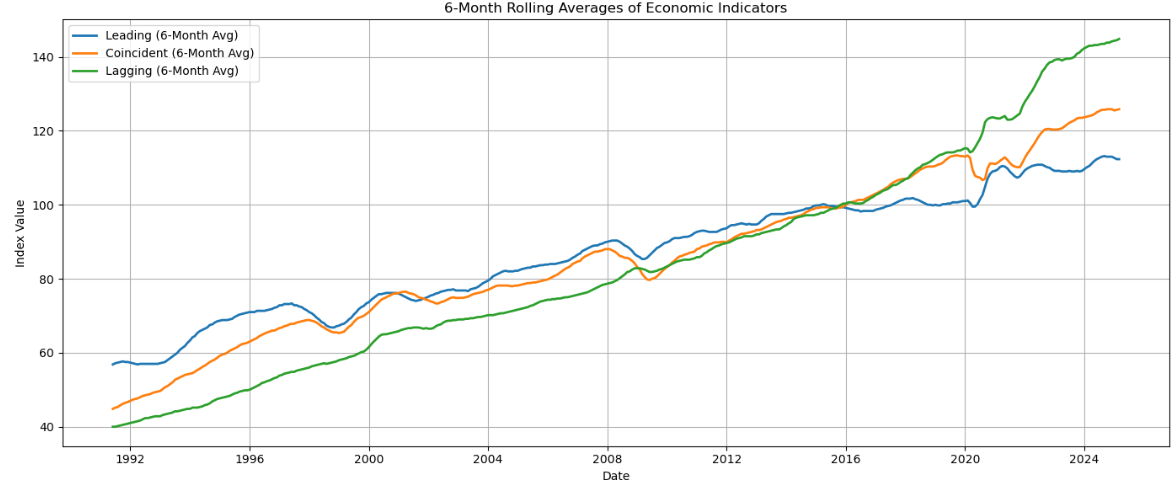

### **Discussion and Finding**<a name='summary'></a>

**Time Series Plot of Economic Indicators**

The time series plot illustrates the progression of three key economic indicators—Leading Index, Coincident Index, and Lagging Index—from the early 1990s through 2024. Each index reflects a different phase of the economic cycle. The Leading Index, which forecasts future economic activity, often changes direction before the broader economy does. This is visible in early signals of downturns such as the 2008 financial crisis and the COVID-19 pandemic around 2020. The Coincident Index tracks the current state of the economy, and as expected, it generally follows the path of the Leading Index but with some delay. The Lagging Index, which responds after economic events have occurred, exhibits noticeable upward movement after economic recovery is already underway, particularly evident after 2020.

One prominent feature is the sharp decline across all three indices around 2020, likely corresponding to the initial economic impact of the COVID-19 pandemic. Interestingly, while the Leading and Coincident indices stabilize or grow moderately after the dip, the Lagging Index shows a much steeper and sustained rise. This could reflect the delayed effects of stimulus spending, business recovery, or other lagging economic indicators such as unemployment rates catching up. Overall, the three indices move in similar long-term trends, with distinct timing differences that reflect their roles in economic analysis.


**Correlation Heatmap of Economic Indicators**

The correlation heatmap provides a quantitative assessment of the relationships among the economic indicators and their diffusion indexes. It reveals very strong positive correlations between the three main indices: Leading, Coincident, and Lagging. For instance, the correlation between the Leading and Coincident indices is 0.98, and between the Coincident and Lagging indices, it is also 0.98. This suggests that although these indices are designed to represent different stages of the economic cycle, their movements are highly synchronized over the long term. These high correlations reinforce the idea that they respond to shared economic forces, though potentially at different times.

In contrast, the diffusion indices—leading_diffusion and coincident_diffusion—exhibit weak or slightly negative correlations with the main indices. For example, leading_diffusion has a correlation of –0.05 with the Leading Index, and –0.10 with both the Coincident and Lagging indices. These weak relationships suggest that the diffusion indices capture different dynamics, potentially related to breadth or momentum rather than absolute levels. Interestingly, the correlation between the two diffusion indices themselves is moderate (0.41), indicating they may contain some shared underlying signals. Overall, this heatmap emphasizes the strength of the relationships among the primary economic indicators while highlighting the more independent behavior of their diffusion counterparts.

**Rolling Averages of Economic Indicators**

The third visualization presents 6-month rolling averages of the Leading, Coincident, and Lagging indices, effectively smoothing out short-term fluctuations to reveal longer-term trends. This technique provides a clearer picture of cyclical movements by reducing noise from month-to-month volatility. The overall trends from the time series plot remain intact but appear more gradual and continuous, making it easier to identify economic cycles and sustained shifts.

Notably, the severe dip seen around 2020 in the raw data is more muted in the rolling averages, underscoring the value of smoothing in times of sharp, short-term disruption. After this dip, the Lagging Index shows a particularly strong and consistent upward trend, suggesting that certain post-pandemic economic indicators (e.g., debt levels, interest rates, or inflation) continued to rise even as more immediate measures stabilized. Meanwhile, the Leading Index appears to level off in recent years, potentially indicating slower forward-looking growth or caution in economic outlooks. Overall, the rolling average chart supports strategic insights by emphasizing sustained movements over short-term shocks.

### **Conclusion**<a name='conclusion'></a>

Based on the findings, several actionable strategies can be considered to improve economic planning and resilience. The strong predictive capability of the Leading Index suggests it can serve as the foundation for enhanced early warning systems, enabling policymakers and financial institutions to detect signs of economic downturns earlier and implement timely interventions. Additionally, the temporal lag relationships observed among the leading, coincident, and lagging indices can inform the strategic timing of fiscal and monetary policies. For instance, counter-cyclical measures such as stimulus injections or interest rate adjustments can be introduced at the initial signs of decline in the Leading Index, while more structural and recovery-oriented policies may be guided by shifts in the Lagging Index.

Furthermore, although the diffusion indices show weaker correlations with the primary indicators, their moderate internal correlation suggests they can still offer valuable insights into the breadth and dispersion of economic momentum across sectors. This could inform more nuanced, sector-specific strategies and support mechanisms, particularly in industries that may recover at different paces. For businesses and investors, the rolling average trends provide clearer visibility into long-term economic directions, which can support better-aligned operational planning, capital allocation, and risk management decisions.

Finally, the incorporation of these economic indicators into data-driven forecasting models—whether econometric or machine learning-based—can enhance the accuracy of projections related to key macroeconomic variables such as GDP growth, inflation, and employment. This integration will not only improve policy formulation and business planning but also contribute to more robust and adaptive economic systems capable of weathering future shocks.
